In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [29]:
!wget https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyFatalityCountData.xlsx

--2021-08-31 15:29:58--  https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyFatalityCountData.xlsx
Resolving dshs.texas.gov (dshs.texas.gov)... 52.26.98.234
Connecting to dshs.texas.gov (dshs.texas.gov)|52.26.98.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373415 (365K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘TexasCOVID19DailyCountyFatalityCountData.xlsx.4’

TexasCOVID19DailyCo 100%[===================>] 364.66K   942KB/s    in 0.4s    

2021-08-31 15:30:00 (942 KB/s) - ‘TexasCOVID19DailyCountyFatalityCountData.xlsx.4’ saved [373415/373415]



In [30]:
!pip3 install openpyxl

In [31]:
df_Texas_Covid_Fatalities = pd.read_excel("./TexasCOVID19DailyCountyFatalityCountData.xlsx",header=2,  engine='openpyxl')

In [32]:
df_Texas_Covid_Fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Columns: 542 entries, County Name to Fatalities 08-29-2021
dtypes: int64(541), object(1)
memory usage: 1.1+ MB


In [33]:
a = df_Texas_Covid_Fatalities

In [34]:
a = df_Texas_Covid_Fatalities.set_index('County Name')

In [35]:
a

,Fatalities 03-07-2020,Fatalities 03-08-2020,Fatalities 03-09-2020,Fatalities 03-10-2020,Fatalities 03-11-2020,Fatalities 03-12-2020,Fatalities 03-13-2020,Fatalities 03-14-2020,Fatalities 03-15-2020,Fatalities 03-16-2020,...,Fatalities 08-20-2021,Fatalities 08-21-2021,Fatalities 08-22-2021,Fatalities 08-23-2021,Fatalities 08-24-2021,Fatalities 08-25-2021,Fatalities 08-26-2021,Fatalities 08-27-2021,Fatalities 08-28-2021,Fatalities 08-29-2021
County Name,,,,,,,,,,,,,,,,,,,,,
ANDERSON,0,0,0,0,0,0,0,0,0,0,...,137,137,137,137,137,137,137,137,137,137
ANDREWS,0,0,0,0,0,0,0,0,0,0,...,48,48,48,48,48,48,48,48,48,48
ANGELINA,0,0,0,0,0,0,0,0,0,0,...,303,303,303,303,304,304,304,304,304,304
ARANSAS,0,0,0,0,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,47
ARCHER,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOUNG,0,0,0,0,0,0,0,0,0,0,...,46,46,46,46,47,48,48,48,48,48
ZAPATA,0,0,0,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38
ZAVALA,0,0,0,0,0,0,0,0,0,0,...,46,47,47,47,47,47,47,47,47,47


In [36]:
a.T.BEXAR

Fatalities 03-07-2020       0
Fatalities 03-08-2020       0
Fatalities 03-09-2020       0
Fatalities 03-10-2020       0
Fatalities 03-11-2020       0
                         ... 
Fatalities 08-25-2021    4002
Fatalities 08-26-2021    4002
Fatalities 08-27-2021    4002
Fatalities 08-28-2021    4002
Fatalities 08-29-2021    4002
Name: BEXAR, Length: 541, dtype: int64

In [37]:
a.columns

Index(['Fatalities 03-07-2020', 'Fatalities 03-08-2020',
       'Fatalities 03-09-2020', 'Fatalities 03-10-2020',
       'Fatalities 03-11-2020', 'Fatalities 03-12-2020',
       'Fatalities 03-13-2020', 'Fatalities 03-14-2020',
       'Fatalities 03-15-2020', 'Fatalities 03-16-2020',
       ...
       'Fatalities 08-20-2021', 'Fatalities 08-21-2021',
       'Fatalities 08-22-2021', 'Fatalities 08-23-2021',
       'Fatalities 08-24-2021', 'Fatalities 08-25-2021',
       'Fatalities 08-26-2021', 'Fatalities 08-27-2021',
       'Fatalities 08-28-2021', 'Fatalities 08-29-2021'],
      dtype='object', length=541)

In [38]:
a.T.BEXAR[1:]

Fatalities 03-08-2020       0
Fatalities 03-09-2020       0
Fatalities 03-10-2020       0
Fatalities 03-11-2020       0
Fatalities 03-12-2020       0
                         ... 
Fatalities 08-25-2021    4002
Fatalities 08-26-2021    4002
Fatalities 08-27-2021    4002
Fatalities 08-28-2021    4002
Fatalities 08-29-2021    4002
Name: BEXAR, Length: 540, dtype: int64

In [39]:
a.T.BEXAR[1:].index[0][11:]

'03-08-2020'

In [40]:
dated_dict = {}
count = 0
for x in a.T.BEXAR[1:].index:
    day_temp = int(x[14:16])
    month_temp = int(x[11:13])
    year_temp = int(x[17:21])
    print(x)
    print(year_temp, month_temp, day_temp)
    dated_dict[datetime.datetime(year_temp, month_temp, day_temp)] = a.T.BEXAR[count + 1]
    count += 1   
    

Fatalities 03-08-2020
2020 3 8
Fatalities 03-09-2020
2020 3 9
Fatalities 03-10-2020
2020 3 10
Fatalities 03-11-2020
2020 3 11
Fatalities 03-12-2020
2020 3 12
Fatalities 03-13-2020
2020 3 13
Fatalities 03-14-2020
2020 3 14
Fatalities 03-15-2020
2020 3 15
Fatalities 03-16-2020
2020 3 16
Fatalities 03-17-2020
2020 3 17
Fatalities 03-18-2020
2020 3 18
Fatalities 03-19-2020
2020 3 19
Fatalities 03-20-2020
2020 3 20
Fatalities 03-21-2020
2020 3 21
Fatalities 03-22-2020
2020 3 22
Fatalities 03-23-2020
2020 3 23
Fatalities 03-24-2020
2020 3 24
Fatalities 03-25-2020
2020 3 25
Fatalities 03-26-2020
2020 3 26
Fatalities 03-27-2020
2020 3 27
Fatalities 03-28-2020
2020 3 28
Fatalities 03-29-2020
2020 3 29
Fatalities 03-30-2020
2020 3 30
Fatalities 03-31-2020
2020 3 31
Fatalities 04-01-2020
2020 4 1
Fatalities 04-02-2020
2020 4 2
Fatalities 04-03-2020
2020 4 3
Fatalities 04-04-2020
2020 4 4
Fatalities 04-05-2020
2020 4 5
Fatalities 04-06-2020
2020 4 6
Fatalities 04-07-2020
2020 4 7
Fatalities 04-08-

2020 11 25
Fatalities 11-26-2020
2020 11 26
Fatalities 11-27-2020
2020 11 27
Fatalities 11-28-2020
2020 11 28
Fatalities 11-29-2020
2020 11 29
Fatalities 11-30-2020
2020 11 30
Fatalities 12-01-2020
2020 12 1
Fatalities 12-02-2020
2020 12 2
Fatalities 12-03-2020
2020 12 3
Fatalities 12-04-2020
2020 12 4
Fatalities 12-05-2020
2020 12 5
Fatalities 12-06-2020
2020 12 6
Fatalities 12-07-2020
2020 12 7
Fatalities 12-08-2020
2020 12 8
Fatalities 12-09-2020
2020 12 9
Fatalities 12-10-2020
2020 12 10
Fatalities 12-11-2020
2020 12 11
Fatalities 12-12-2020
2020 12 12
Fatalities 12-13-2020
2020 12 13
Fatalities 12-14-2020
2020 12 14
Fatalities 12-15-2020
2020 12 15
Fatalities 12-16-2020
2020 12 16
Fatalities 12-17-2020
2020 12 17
Fatalities 12-18-2020
2020 12 18
Fatalities 12-19-2020
2020 12 19
Fatalities 12-20-2020
2020 12 20
Fatalities 12-21-2020
2020 12 21
Fatalities 12-22-2020
2020 12 22
Fatalities 12-23-2020
2020 12 23
Fatalities 12-24-2020
2020 12 24
Fatalities 12-25-2020
2020 12 25
Fataliti

In [41]:
dated_dict

{datetime.datetime(2020, 3, 8, 0, 0): 0,
 datetime.datetime(2020, 3, 9, 0, 0): 0,
 datetime.datetime(2020, 3, 10, 0, 0): 0,
 datetime.datetime(2020, 3, 11, 0, 0): 0,
 datetime.datetime(2020, 3, 12, 0, 0): 0,
 datetime.datetime(2020, 3, 13, 0, 0): 0,
 datetime.datetime(2020, 3, 14, 0, 0): 0,
 datetime.datetime(2020, 3, 15, 0, 0): 0,
 datetime.datetime(2020, 3, 16, 0, 0): 0,
 datetime.datetime(2020, 3, 17, 0, 0): 0,
 datetime.datetime(2020, 3, 18, 0, 0): 0,
 datetime.datetime(2020, 3, 19, 0, 0): 0,
 datetime.datetime(2020, 3, 20, 0, 0): 0,
 datetime.datetime(2020, 3, 21, 0, 0): 1,
 datetime.datetime(2020, 3, 22, 0, 0): 1,
 datetime.datetime(2020, 3, 23, 0, 0): 1,
 datetime.datetime(2020, 3, 24, 0, 0): 2,
 datetime.datetime(2020, 3, 25, 0, 0): 3,
 datetime.datetime(2020, 3, 26, 0, 0): 5,
 datetime.datetime(2020, 3, 27, 0, 0): 5,
 datetime.datetime(2020, 3, 28, 0, 0): 5,
 datetime.datetime(2020, 3, 29, 0, 0): 7,
 datetime.datetime(2020, 3, 30, 0, 0): 9,
 datetime.datetime(2020, 3, 31, 0, 0

In [42]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Total Cases'])

In [43]:
dated_df

,Date,Total Cases
0,2020-03-08,0
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0
...,...,...
535,2021-08-25,4002
536,2021-08-26,4002
537,2021-08-27,4002
538,2021-08-28,4002


In [44]:
c = dated_df.set_index('Date')

In [45]:
c_7day_moving= c.rolling(7).mean().shift()

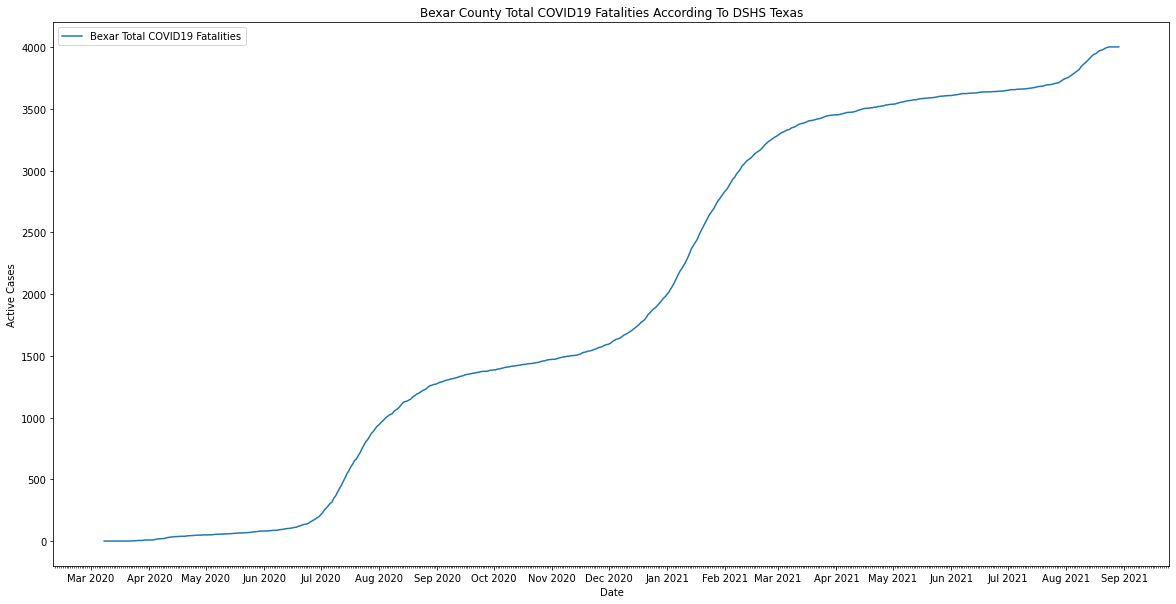

In [46]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Active Cases',color='black')
plt.plot(c)
plt.legend(['Bexar Total COVID19 Fatalities'], loc='upper left')
plt.title('Bexar County Total COVID19 Fatalities According To DSHS Texas')
plt.savefig('BexarFatalities.png')